##### 1. Open the video game sales using pandas. Check characteristics of the dataset. What is the shape of the dataset, what are the statistics of the columns, are there any NaNs?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('csv/vgsales.csv')

##### 2. Clean the dataset (if you find any NaNs)

In [2]:
# by default how='any' and subset=columns. This will eliminate null values from the dataframe
df.dropna(inplace=True)

##### 3. Which game has the highest global sales? What is its platform?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  int64  
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


##### 4. Which are the platforms in the dataset?

In [4]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

##### 5. Which are the top ten selling games for PS4 (Global sales)? Is this the same for Europe and Japan sales combined?

In [5]:
global_PS4_sales_sorted = df[df['Platform'] == 'PS4'].sort_values("Global_Sales", ascending=False).head(10)
global_PS4_sales_sorted

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,Call of Duty: Black Ops 3,PS4,2015.0,7,Activision,5.77,5.81,0.35,2.31,14.24
44,Grand Theft Auto V,PS4,2014.0,9,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,FIFA 16,PS4,2015.0,1,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,Star Wars Battlefront (2015),PS4,2015.0,7,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,Call of Duty: Advanced Warfare,PS4,2014.0,7,Activision,2.80,3.30,0.14,1.37,7.60
109,Fallout 4,PS4,2015.0,4,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96
124,FIFA 15,PS4,2014.0,1,Electronic Arts,0.79,4.29,0.05,1.47,6.59
154,Destiny,PS4,2014.0,7,Activision,2.49,2.05,0.16,0.96,5.65
221,FIFA 17,PS4,2016.0,1,Electronic Arts,0.28,3.75,0.06,0.69,4.77
236,The Last of Us,PS4,2014.0,9,Sony Computer Entertainment,1.78,1.87,0.07,0.82,4.55


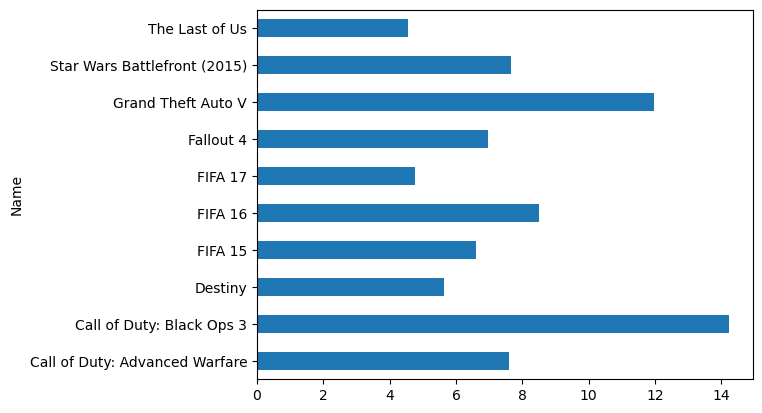

In [6]:
ps4_game_sales_bar = global_PS4_sales_sorted.groupby('Name')['Global_Sales'].sum()  # It is just one entry sum returns it
ps4_game_sales_bar.plot(kind='barh')
plt.show()

In [7]:
global_PS4_sales_sorted['JPN_EU_SALES'] = global_PS4_sales_sorted['EU_Sales'] + global_PS4_sales_sorted['JP_Sales']
eu_jpn_sales_PS4_sorted = global_PS4_sales_sorted.sort_values('JPN_EU_SALES', ascending=False).head(10)
eu_jpn_sales_PS4_sorted

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,JPN_EU_SALES
44,Grand Theft Auto V,PS4,2014.0,9,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,6.17
33,Call of Duty: Black Ops 3,PS4,2015.0,7,Activision,5.77,5.81,0.35,2.31,14.24,6.16
77,FIFA 16,PS4,2015.0,1,Electronic Arts,1.11,6.06,0.06,1.26,8.49,6.12
124,FIFA 15,PS4,2014.0,1,Electronic Arts,0.79,4.29,0.05,1.47,6.59,4.34
221,FIFA 17,PS4,2016.0,1,Electronic Arts,0.28,3.75,0.06,0.69,4.77,3.81
92,Star Wars Battlefront (2015),PS4,2015.0,7,Electronic Arts,2.93,3.29,0.22,1.23,7.67,3.51
93,Call of Duty: Advanced Warfare,PS4,2014.0,7,Activision,2.80,3.30,0.14,1.37,7.60,3.44
109,Fallout 4,PS4,2015.0,4,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96,3.39
154,Destiny,PS4,2014.0,7,Activision,2.49,2.05,0.16,0.96,5.65,2.21
236,The Last of Us,PS4,2014.0,9,Sony Computer Entertainment,1.78,1.87,0.07,0.82,4.55,1.94


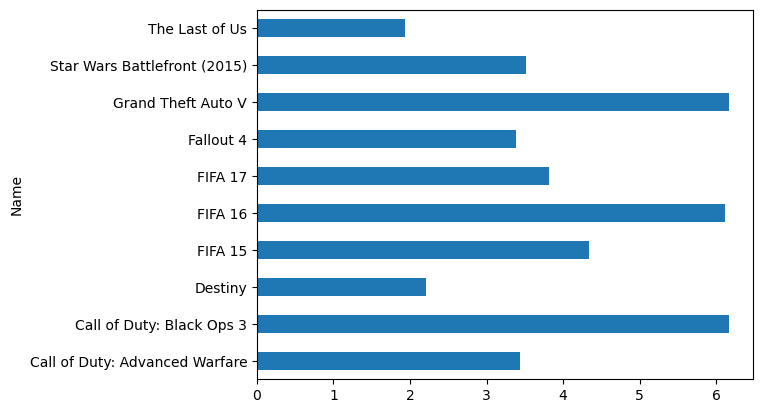

In [8]:
ps4_game_sales_bar = global_PS4_sales_sorted.groupby('Name')['JPN_EU_SALES'].sum()  # It is just one entry sum returns it
ps4_game_sales_bar.plot(kind='barh')
plt.show()

We can see that the ranking are different by eye, but can also verify to programmatically by comparing the indices' contents.

In [9]:
eu_jpn_sales_PS4_sorted.index.to_list() == global_PS4_sales_sorted.index.to_list()

False

##### 6. How many games were released for XOne in 2016? Which was the top selling game in Europe?

In [10]:
games_2016_xone = df[(df['Platform'] == 'XOne') & (df['Year'] == 2016)]
games_2016_xone.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
845,Tom Clancy's The Division,XOne,2016.0,7,Ubisoft,1.20,0.62,0.0,0.18,2.01
1224,FIFA 17,XOne,2016.0,1,Electronic Arts,0.17,1.26,0.0,0.10,1.53
2434,Far Cry: Primal,XOne,2016.0,9,Ubisoft,0.46,0.32,0.0,0.07,0.85
2444,Overwatch,XOne,2016.0,7,Activision,0.52,0.25,0.0,0.08,0.85
2505,Madden NFL 17,XOne,2016.0,1,Electronic Arts,0.72,0.02,0.0,0.09,0.82


In [11]:
games_2016_xone['Name'].count()

54

In [12]:
games_2016_xone[games_2016_xone['EU_Sales'] == games_2016_xone['EU_Sales'].max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1224,FIFA 17,XOne,2016.0,1,Electronic Arts,0.17,1.26,0.0,0.1,1.53


##### 7. Replace where XOne with ‘X Box One’

In [13]:
replace_xbox = df['Platform'].replace('XOne', 'X Box One')
replace_xbox[replace_xbox == 'X Box One']

101      X Box One
193      X Box One
197      X Box One
260      X Box One
287      X Box One
           ...    
16530    X Box One
16531    X Box One
16562    X Box One
16569    X Box One
16576    X Box One
Name: Platform, Length: 213, dtype: object

##### 8. How many PC games have higher sales than 3 million global sales?

In [14]:
df[(df['Global_Sales'] > 3) & (df['Platform'] == 'PC')]['Name'].count()

12

##### 9. In which year the most games were released?

In [15]:
df['Year'] = df['Year'].astype('int64')
games_per_year_sorted = df.groupby('Year')['Name'].count().sort_values(ascending=False)
games_per_year_sorted.head()

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
Name: Name, dtype: int64

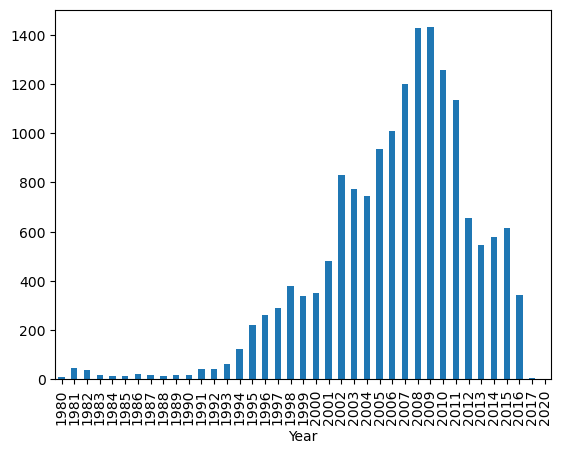

In [16]:
games_per_year_sorted.sort_index().plot(kind='bar')
plt.show()

In [17]:
games_per_year_sorted[games_per_year_sorted == games_per_year_sorted.max()]
# or
games_per_year_sorted.head(1)

Year
2009    1431
Name: Name, dtype: int64

##### 10. Which platform had the most releases that year?

In [18]:
df_in_best_year = df[df['Year'] == games_per_year_sorted.head(1).index[0]]
df_in_best_year.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,Wii Sports Resort,Wii,2009,1,Nintendo,15.75,11.01,3.28,2.96,33.00
8,New Super Mario Bros. Wii,Wii,2009,2,Nintendo,14.59,7.06,4.70,2.26,28.62
14,Wii Fit Plus,Wii,2009,1,Nintendo,9.09,8.59,2.53,1.79,22.00
36,Call of Duty: Modern Warfare 2,X360,2009,7,Activision,8.52,3.63,0.08,1.29,13.51
45,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,9,Nintendo,4.40,2.77,3.96,0.77,11.90


In [19]:
releases_per_platform_best_year = df_in_best_year.groupby('Platform')['Name'].count()
releases_per_platform_best_year

Platform
DS      405
PC      109
PS2      96
PS3     162
PSP     161
Wii     325
X360    173
Name: Name, dtype: int64

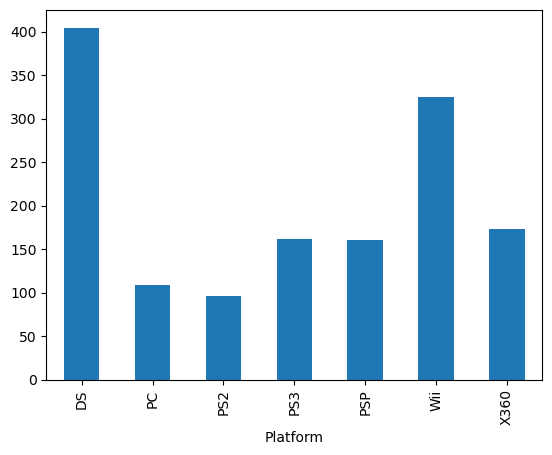

In [20]:
releases_per_platform_best_year.plot(kind='bar')
plt.show()

In [21]:
releases_per_platform_best_year.sort_values(ascending=False)[:1]

Platform
DS    405
Name: Name, dtype: int64